In [ ]:
#Employee Sentiment Analysis Project

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load and Inspect Data
# Updated file path to match local upload scenario
df = pd.read_csv("C:/Users/arunb/Downloads/test.csv")

# Rename columns for consistency
df = df.rename(columns={
    'body': 'Message',
    'date': 'Date',
    'from': 'EmployeeID'
})

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nSample Data:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Shape: (2191, 4)

Column Names: Index(['Subject', 'Message', 'Date', 'EmployeeID'], dtype='object')

Sample Data:
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                             Message        Date  \
0  EnronOptions Announcement\n\n\nWe have updated...  2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ...  2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  2011-07-25   
3  we were thinking papasitos (we can meet somewh...  2010-03-25   
4  Since you never gave me the $20 for the last t...  2011-05-21   

                EmployeeID  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@

In [3]:
df.head()

,Subject,Message,Date,EmployeeID
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


In [4]:
# Step 2: Sentiment Labeling
# Simple custom rule-based sentiment function (without TextBlob)
def get_sentiment(text):
    if pd.isnull(text):
        return 'Neutral'
    
    positive_words = ["good", "great", "happy", "love", "excellent", "fortunate", 
                     "correct", "superior", "awesome", "thank", "appreciate", "perfect"]
    negative_words = ["bad", "terrible", "sad", "hate", "poor", "unfortunate", 
                     "wrong", "inferior", "awful", "quit", "frustrated", "angry"]
    
    text = str(text).lower()
    
    pos_score = sum(word in text for word in positive_words)
    neg_score = sum(word in text for word in negative_words)
    
    if pos_score > neg_score:
        return 'Positive'
    elif neg_score > pos_score:
        return 'Negative'
    else:
        return 'Neutral'

# Combine Subject and Body for better sentiment analysis
df['Full_Message'] = df['Subject'].fillna('') + ' ' + df['Message'].fillna('')

# Apply sentiment function
df['Sentiment'] = df['Full_Message'].apply(get_sentiment)

print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())



Sentiment Distribution:
Sentiment
Neutral     1360
Positive     809
Negative      22
Name: count, dtype: int64


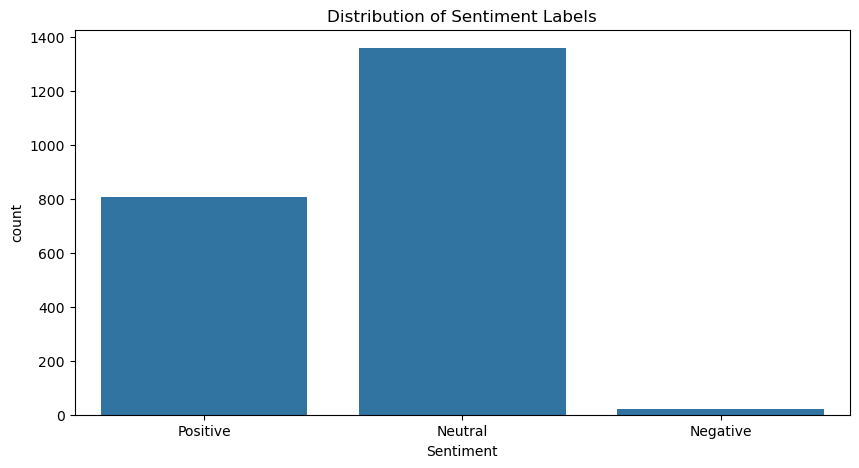

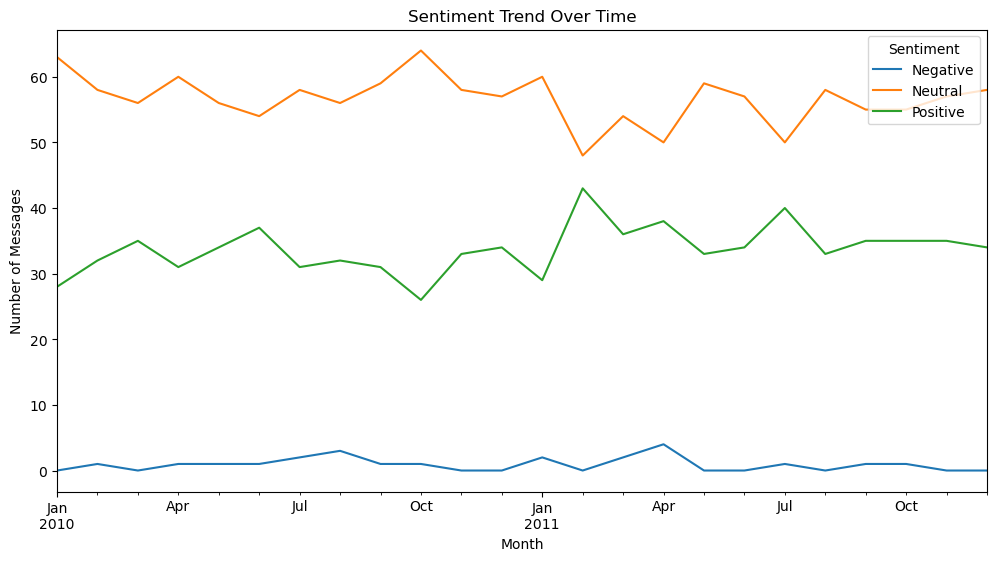

In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# Plot Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Labels')
plt.show()

# Sentiment Trends Over Time
sentiment_trends = df.groupby(['Month', 'Sentiment']).size().unstack().fillna(0)
sentiment_trends.plot(kind='line', figsize=(12,6))
plt.title('Sentiment Trend Over Time')
plt.ylabel('Number of Messages')
plt.show()

In [6]:
# Step 4: Employee Score Calculation
sentiment_score = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Score'] = df['Sentiment'].map(sentiment_score)

employee_monthly_score = df.groupby(['EmployeeID', 'Month'])['Score'].sum().reset_index()
print("\nEmployee Monthly Scores:")
print(employee_monthly_score.head())


Employee Monthly Scores:
                    EmployeeID    Month  Score
0  bobette.riner@ipgdirect.com  2010-01      0
1  bobette.riner@ipgdirect.com  2010-02      7
2  bobette.riner@ipgdirect.com  2010-03      4
3  bobette.riner@ipgdirect.com  2010-04      1
4  bobette.riner@ipgdirect.com  2010-05      2


In [7]:
# Step 5: Employee Ranking
# Top 3 Positive Employees per Month
positive_rank = employee_monthly_score.sort_values(['Month', 'Score', 'EmployeeID'], 
                                                 ascending=[True, False, True]).groupby('Month').head(3)

# Top 3 Negative Employees per Month
negative_rank = employee_monthly_score.sort_values(['Month', 'Score', 'EmployeeID'], 
                                                 ascending=[True, True, True]).groupby('Month').head(3)

print("\nTop 3 Positive Employees per Month:")
print(positive_rank)

print("\nTop 3 Negative Employees per Month:")
print(negative_rank)



Top 3 Positive Employees per Month:
                      EmployeeID    Month  Score
120      kayne.coulter@enron.com  2010-01      6
24        don.baughman@enron.com  2010-01      5
48           eric.bass@enron.com  2010-01      4
1    bobette.riner@ipgdirect.com  2010-02      7
97       johnny.palmer@enron.com  2010-02      7
..                           ...      ...    ...
190     patti.thompson@enron.com  2011-11      6
22   bobette.riner@ipgdirect.com  2011-11      5
191     patti.thompson@enron.com  2011-12      8
167      lydia.delgado@enron.com  2011-12      6
71           eric.bass@enron.com  2011-12      5

[72 rows x 3 columns]

Top 3 Negative Employees per Month:
                      EmployeeID    Month  Score
0    bobette.riner@ipgdirect.com  2010-01      0
192      rhonda.denton@enron.com  2010-01      1
216         sally.beck@enron.com  2010-01      1
169     patti.thompson@enron.com  2010-02      0
193      rhonda.denton@enron.com  2010-02      0
..                   

In [10]:
# Step 6: Flight Risk Identification (Robust Version)

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get negative messages
negative_msgs = df[df['Sentiment'] == 'Negative'].copy()

# Sort by EmployeeID and Date
negative_msgs = negative_msgs.sort_values(['EmployeeID', 'Date'])

# Method 1: Using expanding() window with date filtering
def count_recent_negatives(group):
    return group['Date'].apply(
        lambda x: sum((group['Date'] >= x - pd.Timedelta(days=30)) & 
                 (group['Date'] <= x))
    )

negative_msgs['Count_Negatives'] = (
    negative_msgs.groupby('EmployeeID')
    .apply(count_recent_negatives)
    .reset_index(level=0, drop=True)
)

# Method 2: Alternative using fixed 30-day window (simpler)
# negative_msgs['Count_Negatives'] = (
#     negative_msgs.groupby('EmployeeID')
#     .rolling('30D', on='Date')['Sentiment']
#     .count()
#     .reset_index(level=0, drop=True)
# )

# Filter for flight risks (4+ negative messages in 30 days)
flight_risk = negative_msgs[negative_msgs['Count_Negatives'] >= 4]['EmployeeID'].unique()

print("\nEmployees flagged as Flight Risk:")
print(flight_risk)


Employees flagged as Flight Risk:
[]


In [11]:
# Step 7: Predictive Modeling (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

monthly_features = df.groupby(['EmployeeID', 'Month']).agg({
    'Full_Message': 'count',
    'Score': 'mean'
}).reset_index().rename(columns={'Full_Message': 'NumMessages', 'Score': 'AvgSentiment'})

X = monthly_features[['NumMessages']]
y = monthly_features['AvgSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nModel Performance:')
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))



Model Performance:
MSE: 0.04396317281496342
R^2 Score: -0.05536445671737367


In [ ]:
# End of Analysis